### Задание 1. Бусько Полина

##  Модель Барабаши - Альберт.

Модель Барабаши-Альберт — алгоритм генерации случайных безмасштабных сетей с использованием принципа предпочтительного присоединения. Безмасштабные сети широко распространены в природных сетях (пищевые цепочки) и сетях, созданных человеком (Интернет, социальные сети). 
Принцип предпочтительного присоединения заключается в том, что чем больше связей имеет узел, тем более предпочтительно для него создание новых связей. Узлы с наибольшей степенью имеют больше возможностей забирать себе связи, добавляемые в сеть.

### Принцип предпочтительного присоединения

Пусть дан начальный граф с $n_0$ узлами, где $n_0 \geq 2$. Cтепень каждого узла должна быть не меньше 1 (для того, чтобы итоговый граф содержал одну компоненту связности). В каждый момент времени в граф добавляется новая вершина. Каждый новая вершина $v_i$ соединяется с существующими с вероятностью, пропорциональной числу связей этих вершин:
$$ p_i = \frac{d(v)}{\sum_i{d(v_i)}}$$ где $d(v_i)$ - степень вершины $v_i$.

### Свойства модели

+ Распределение степеней вершин соответствует степенному закону не зависимо от числа ребер:$\mathbb{P}(k)\approx k^{-3}$
+ Отражает свойство «малого мира»: при больших $N$ диаметр графа растет как $O(logN)$ для $d=1$ и $O(\frac{logN}{loglogN})$ для $d\geq2$
+ Модель не воспроизводит сообщества
+ Получаемый граф ненаправленный и состоит из одной компоненты


### Основыне характеристики графа

+ Плотность
+ Диаметр
+ Средняя длина кратчайшего пути

### Параметры модели Барабаши - Альберт

+ ```n``` Количество вершин
+ ```m``` Количество ребер, которые добавляет каждый новый узел
+ ```seed``` Индикатор состояния генерации случайных чисел (необязательный параметр)
+ ```initial_graph``` Исходный граф для алгоритма (необязательный параметр)
+ ```create_using``` Тип создаваемого графа (необязательный параметр)

Попробуем сгенерировать несколько небольших графов:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def generate_simple_graphs(Graphs, nodes, e):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        G = nx.barabasi_albert_graph(nodes[i], e)
        Graphs.append(G)
        ax = axes[i]
        nx.draw(G, ax=ax, node_size=200, alpha=1, node_color="darkblue")
        lable = "Кол-во вершин = " + str(G.number_of_nodes()) + " Кол-во ребер = " + str(G.number_of_edges())
        ax.set_title(lable)
    plt.show()

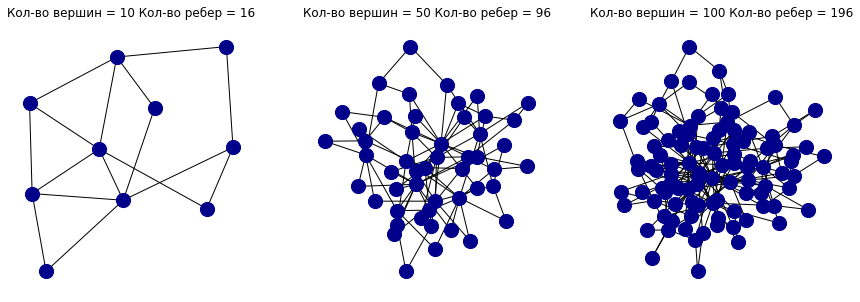

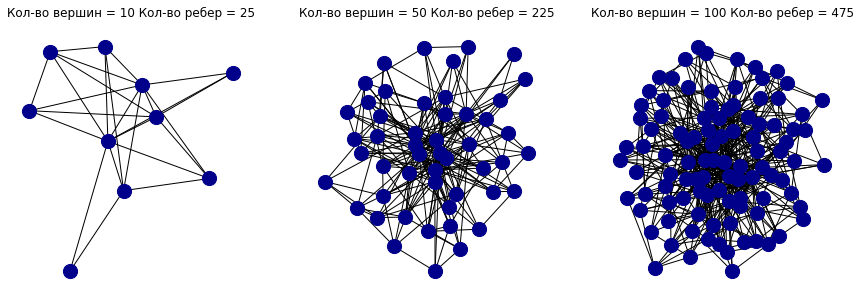

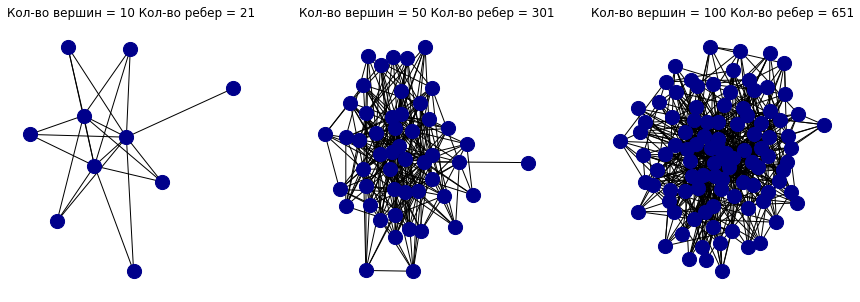

In [3]:
nodes = [10, 50, 100]
eges = [2, 5, 7]

Graphs = []
for i in range(len(nodes)):
    generate_simple_graphs(Graphs, nodes, eges[i])
    

По сгенерированным графам видно, что при увеличении второго параметра генерации (rоличество ребер, которые добавляет каждый новый узел) граф становится более плотным.

Для вычисления характеристик графа написана функция ```calculating_graph_characteristics```. Нет необходимости проверять граф на связность, так как модель Барабаши - Альберт подразумевает только одну компоненту связности.  

Ниже выведены характеристики только для некоторых графов, приедставленных ваше.

In [4]:
def calculating_graph_characteristics(G):
    density_g = nx.density(G)
    diameter_g = nx.diameter(G)
    aspl_g = nx.average_shortest_path_length(G)
    
    print("Характеристики графа:")
    print("Количество вершин = ", G.number_of_nodes())
    print("Количество ребер = ", G.number_of_edges())
    print("Плотность = ", round(density_g, 7))
    print("Диаметр = ", diameter_g)
    print("Среднее кратчайшее расстояние = ", round(aspl_g, 7))
    print("============================================")
    
def plot_density_vs_nodes(Graphs):
    densities_0 = []
    node_counts_0 = [] 
    for i in [0, 1, 2]:
        densities_0.append(nx.density(Graphs[i]))
        node_counts_0.append(Graphs[i].number_of_nodes())
    
    plt.figure(figsize=(10, 6))
    plt.plot(node_counts_0, densities_0, '-', color='darkblue', linewidth=2, markersize=8, label=f'm = 2')
    
    densities_1 = []
    node_counts_1 = []  
    for i in [3, 4, 5]:
        densities_1.append(nx.density(Graphs[i]))
        node_counts_1.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_1, densities_1, '-', color='darkgreen', linewidth=2, markersize=8, label=f'm = 5')
    
    densities_2 = []
    node_counts_2 = []  
    for i in [6, 7, 8]:
        densities_2.append(nx.density(Graphs[i]))
        node_counts_2.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_2, densities_2, '-', color='darkred', linewidth=2, markersize=8, label=f'm = 7')
    
    plt.xlabel('Количество вершин')
    plt.ylabel('Плотность')
    plt.title('Зависимость плотности графа от количества вершин')
    plt.tight_layout()
    plt.legend()
    plt.show()

def plot_diametr_vs_nodes(Graphs):
    diametr_0 = []
    node_counts_0 = [] 
    for i in [0, 1, 2]:
        diametr_0.append(nx.diameter(Graphs[i]))
        node_counts_0.append(Graphs[i].number_of_nodes())
    
    plt.figure(figsize=(10, 6))
    plt.plot(node_counts_0, diametr_0, '-', color='darkblue', linewidth=2, markersize=8, label=f'm = 2')
    
    diametr_1 = []
    node_counts_1 = []  
    for i in [3, 4, 5]:
        diametr_1.append(nx.diameter(Graphs[i]))
        node_counts_1.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_1, diametr_1, '-', color='darkgreen', linewidth=2, markersize=8, label=f'm = 5')
    
    diametr_2 = []
    node_counts_2 = []  
    for i in [6, 7, 8]:
        diametr_2.append(nx.diameter(Graphs[i]))
        node_counts_2.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_2, diametr_2, '-', color='darkred', linewidth=2, markersize=8, label=f'm = 7')
    
    plt.xlabel('Количество вершин')
    plt.ylabel('Диаметр')
    plt.title('Зависимость диаметра графа от количества вершин')
    plt.tight_layout()
    plt.legend()
    plt.show()
    
def plot_aspl_vs_nodes(Graphs):
    aspl_0 = []
    node_counts_0 = [] 
    for i in [0, 1, 2]:
        aspl_0.append(nx.average_shortest_path_length(Graphs[i]))
        node_counts_0.append(Graphs[i].number_of_nodes())
    
    plt.figure(figsize=(10, 6))
    plt.plot(node_counts_0, aspl_0, '-', color='darkblue', linewidth=2, markersize=8, label=f'm = 2')
    
    aspl_1 = []
    node_counts_1 = []  
    for i in [3, 4, 5]:
        aspl_1.append(nx.average_shortest_path_length(Graphs[i]))
        node_counts_1.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_1, aspl_1, '-', color='darkgreen', linewidth=2, markersize=8, label=f'm = 5')
    
    aspl_2 = []
    node_counts_2 = []  
    for i in [6, 7, 8]:
        aspl_2.append(nx.average_shortest_path_length(Graphs[i]))
        node_counts_2.append(Graphs[i].number_of_nodes())
        
    plt.plot(node_counts_2, aspl_2, '-', color='darkred', linewidth=2, markersize=8, label=f'm = 7')
    
    plt.xlabel('Количество вершин')
    plt.ylabel('Средей кратчайший путь')
    plt.title('Зависимость среднего кратчайшего пути в графе от количества вершин')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [5]:
g=[0, 1, 2]
for i in g:
    calculating_graph_characteristics(Graphs[i])

Характеристики графа:
Количество вершин =  10
Количество ребер =  16
Плотность =  0.3555556
Диаметр =  3
Среднее кратчайшее расстояние =  1.7777778
Характеристики графа:
Количество вершин =  50
Количество ребер =  96
Плотность =  0.0783673
Диаметр =  5
Среднее кратчайшее расстояние =  2.6922449
Характеристики графа:
Количество вершин =  100
Количество ребер =  196
Плотность =  0.039596
Диаметр =  6
Среднее кратчайшее расстояние =  3.1189899


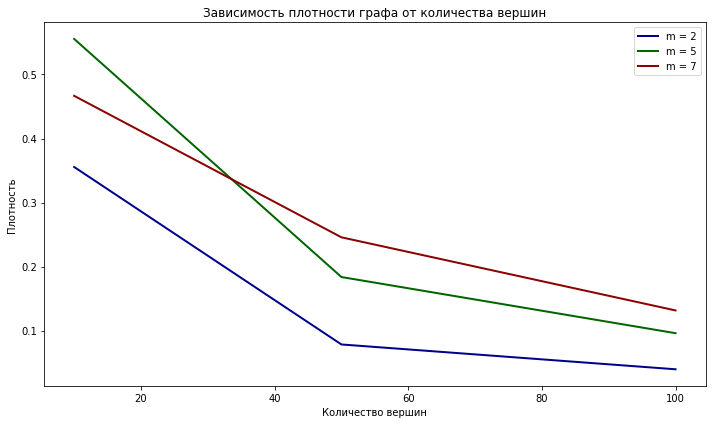

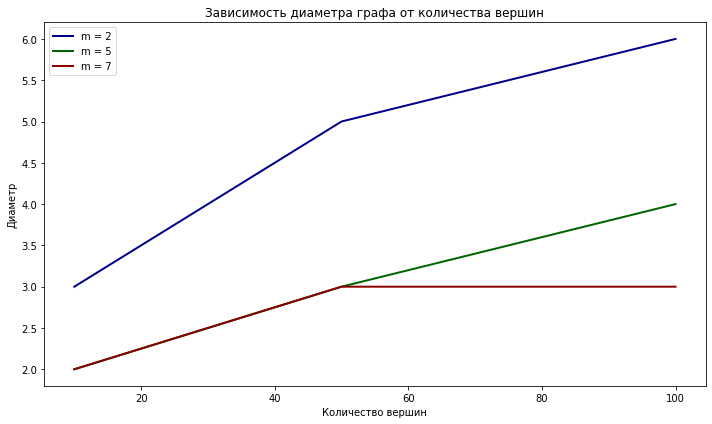

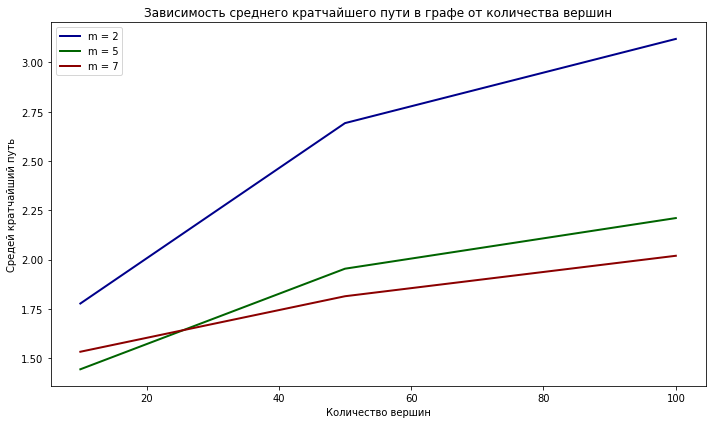

In [6]:
plot_density_vs_nodes(Graphs)
plot_diametr_vs_nodes(Graphs)
plot_aspl_vs_nodes(Graphs)

По полученным результатам видно, что при увеличении количества вершин в графе и постоянном количестве ребер, генерируемых при добавлении новой вершины, плотность графа уменьшается, диаметр графа и срденее кратчайшее расстояние увеличиваются.

In [7]:
g=[2, 5, 8]
for i in g:
    calculating_graph_characteristics(Graphs[i])

Характеристики графа:
Количество вершин =  100
Количество ребер =  196
Плотность =  0.039596
Диаметр =  6
Среднее кратчайшее расстояние =  3.1189899
Характеристики графа:
Количество вершин =  100
Количество ребер =  475
Плотность =  0.0959596
Диаметр =  4
Среднее кратчайшее расстояние =  2.2109091
Характеристики графа:
Количество вершин =  100
Количество ребер =  651
Плотность =  0.1315152
Диаметр =  3
Среднее кратчайшее расстояние =  2.019798


Результаты, приведенные выше получены для графов с одним значением количества ребер $N = 100$, при этом параметр генерации ```m``` увеличивался с 2 до 7. Видно, что граф становится плотнее, соответственно диаметр и среднее кратчайщее расстояние уменьшаются.

Проанализируем распреление степеней вершин у получаемых графов. Для этого построим графаики зависимости количества вершин от их степеней.

In [8]:
import numpy as np
from collections import Counter

In [9]:
def analyze_degree_distribution(G):
    degrees = [degree for node, degree in G.degree()]
    degree_count = Counter(degrees)
    
    k_values = list(degree_count.keys())
    n_k_values = list(degree_count.values())

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.bar(k_values, n_k_values, alpha=0.7, color='darkblue')
    plt.xlabel('Степень вершины')
    plt.ylabel('Количество вершин')
    title = "Распределение степеней вершин для графа:\n N = " + str(G.number_of_nodes()) + ", E = " + str(G.number_of_edges())
    plt.title(title)

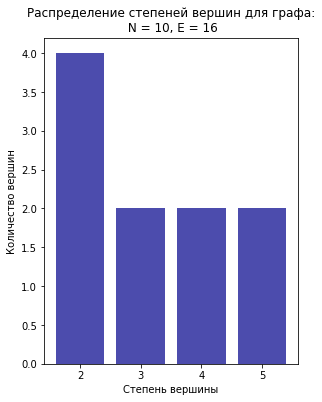

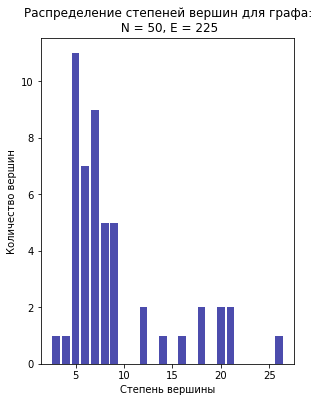

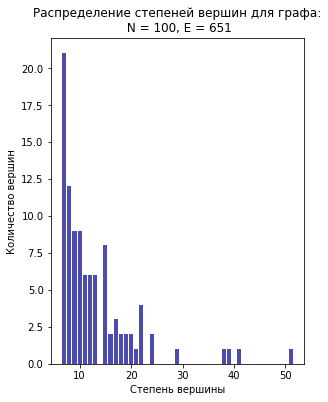

In [10]:
gg = [0, 4, 8]
for i in gg:
    analyze_degree_distribution(Graphs[i])

По приведенным графикам видно, что наибольшее количество вершин в графах имеют степень, равную второму параметру генерации (количество ребер, привносимое новой вершиной).  
Также, количетсво вершин с большими значениями степени уменьшается.

In [11]:
def analyze_degree_distribution_2(G):
    degrees = [degree for node, degree in G.degree()]
    
    degree_count = Counter(degrees)
    k_values = np.array(sorted(degree_count.keys()))
    n_k_values = np.array([degree_count[k] for k in k_values])
    p_k_values = n_k_values / G.number_of_nodes()
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    
    plt.plot(k_values, n_k_values, 'o-', alpha=0.7, linewidth=2, markersize=4, color='darkblue')
    
    mask = k_values >= 2
    if np.sum(mask) > 0:
        log_k = np.log(k_values[mask])
        log_n = np.log(n_k_values[mask])
        slope, intercept = np.polyfit(log_k, log_n, 1)
        
        k_fit = np.linspace(k_values[mask].min(), k_values[mask].max(), 100)
        n_fit = np.exp(intercept) * k_fit ** slope
        plt.plot(k_fit, n_fit, 'r-', linewidth=2, label=f'Степенной закон')
    
    plt.xlabel('Степень вершины')
    plt.ylabel('Количество вершин')
    plt.title('Линейный график: $N(k)$')
    plt.grid(True, alpha=0.3)
    plt.legend()

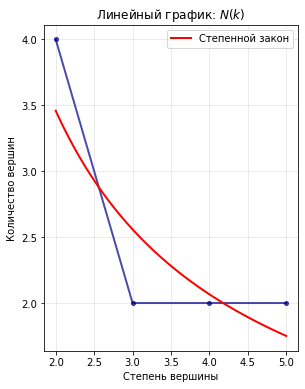

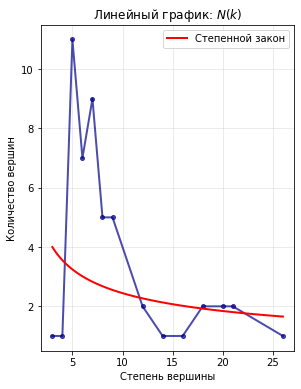

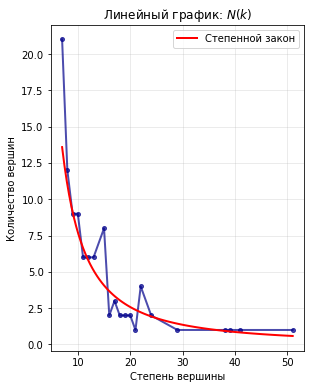

In [12]:
gg = [0, 4, 8]
for i in gg:
    analyze_degree_distribution_2(Graphs[i])

Видно, что на малых гафах степенной закон подтверждается.  
Посмотрим, что будет при увеличении размерности графа.

In [13]:
nodes = [50000, 100000, 125000, 200000]
eges = [15, 30, 100, 150]

Graphs = []
for i in range (len(nodes)):
    for j in range (len(eges)):
        G = nx.barabasi_albert_graph(nodes[i], eges[j])
        Graphs.append(G)
#print (len(Graphs))

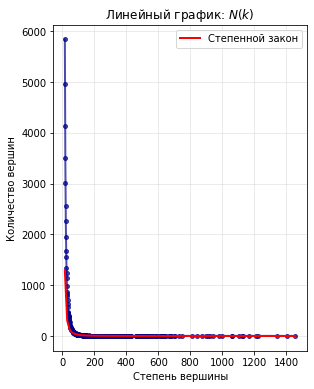

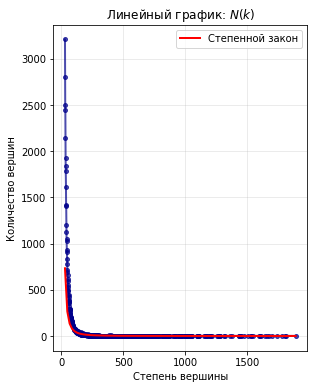

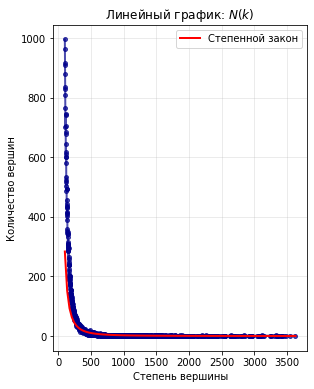

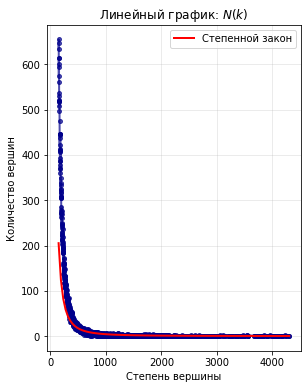

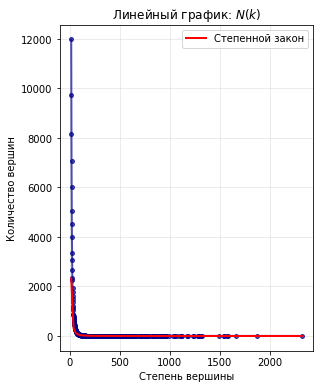

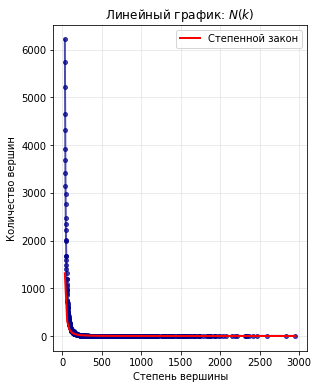

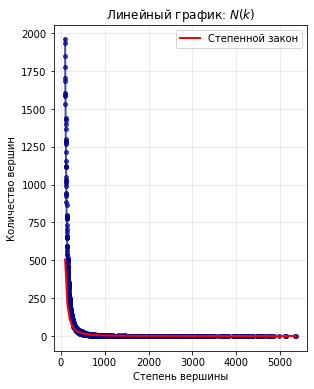

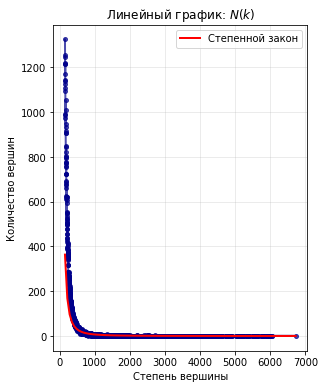

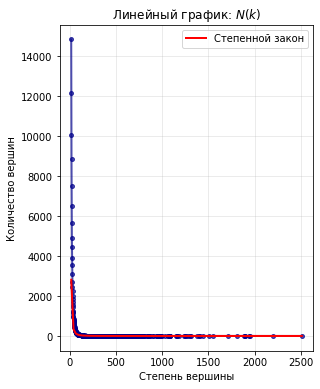

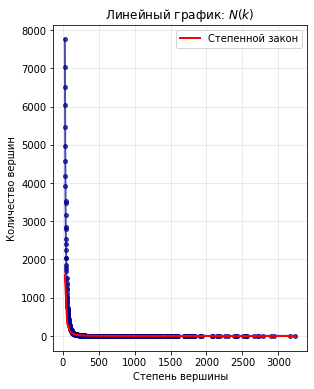

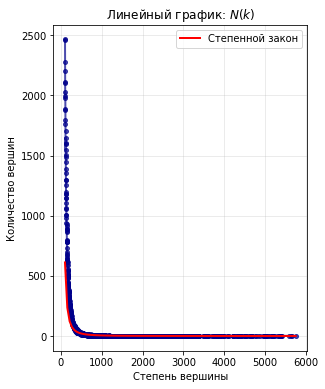

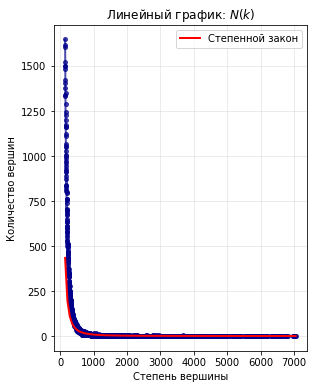

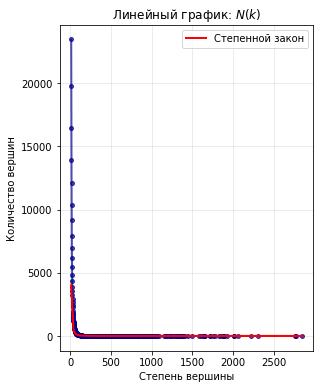

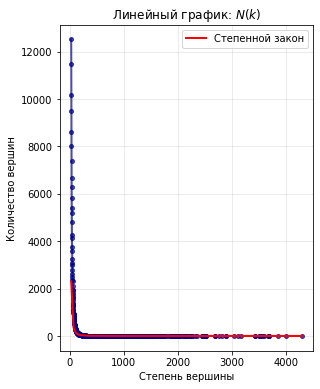

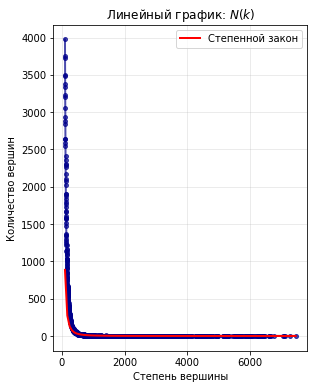

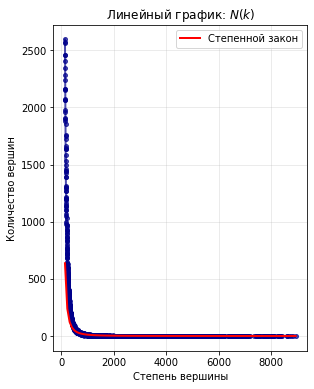

In [14]:
for i in range (len(Graphs)):
    analyze_degree_distribution_2(Graphs[i])

Представленные выше графики подтвержадют, что распределение степеней вершин сгенерированных графов соответствует степенному закону не зависимо от числа ребер.

### Заключение
В ходе работы была изучена библиотека для работы с графами NetworkX. Написана программная реализация на язке Python для генерации графов с различными параметрами, определения их характеристик. Также экспериментально подтверждено, что граф, полученные в результате генерации соответствуют теоретически ожидаемым резальтатам.  

При постоянном количестве вершин и увеличивающемся количестве ребер граф становится более плотным, диаметр и среднее кратчайшее расстояние уменьшаются. Если же постпуить наоборот: сделать параметр генерации, отвечающий за количество добавляемых ребер при просиединении новой вершины, постоянным, а число вершин увеличивать, то будет получаться менее плотные графы, что влечет за собой увеличение диаметра и среднего кратчайшего пути.